In [1]:
PATH= '../../../images'

`cv2.imread()` 이미지 파일을 읽습니다. 이미지 파일의 경로는 절대/상대경로가 가능

In [2]:
import cv2
cv2.imread?

Docstring:
imread(filename[, flags]) -> retval
.   @brief Loads an image from a file.
.   
.   @anchor imread
.   
.   The function imread loads an image from the specified file and returns it. If the image cannot be
.   read (because of missing file, improper permissions, unsupported or invalid format), the function
.   returns an empty matrix ( Mat::data==NULL ).
.   
.   Currently, the following file formats are supported:
.   
.   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
.   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
.   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
.   -   Portable Network Graphics - \*.png (see the *Note* section)
.   -   WebP - \*.webp (see the *Note* section)
.   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
.   -   PFM files - \*.pfm (see the *Note* section)
.   -   Sun rasters - \*.sr, \*.ras (always supported)
.   -   TIFF files - \*.tiff, \*.tif (see the *Note* section)
.  

`cv2.imread(fileName, flag)`

Parameters :
* `fileName` (str)  이미지파일의 경로
* `flag` (int)  이미지 파일을 읽을 때의 Option.

Return :
* image object's array
* type : `numpy.ndarray`

flag
* 1 : `cv2.IMREAD_COLOR` (default)
* 0 : `cv2.IMREAD_GRAY`
* -1 : `cv2.IMREAD_UNCHAGED` alpha channel까지 포함하여 읽어 들입니다.


# Histogram in OpenCV

* `BINS` : 
    * 히스토그램 그래프의 X축(intensity)의 bin의 수(`histSize`)를 결정 .
    * 8bit gray scale 영상의 경우에는 0 ~ 255로 intensity가 표현되며, 이 경우 BINS은 최대 256 의 수를 가질 수 있음.
    * 만약, BINS값이 16으로 지정할 경우, 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개의 bin으로 표현이 됨.
    * 이는 intensity가 0~15까지 같은 bin에서 카운팅 됨을 의미!
    * OpenCV에서는 BINS를 histSize 라고 표현합니다.
* `channels` : 
    * 이미지에서 histogram을 만들기 위해 사용하는 값을  의미. 
    * 빛의 강도(intensity)를 기준으로 histogram을 만들지, RGB값을 기준으로  만들지를 결정.
* `range` : 
    * X축의 범위임 (각 pixel이 가질 수 있는 범위).
    * = X축의 from ~ to.

In [3]:
cv2.calcHist?

Docstring:
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
.   @overload
Type:      builtin_function_or_method


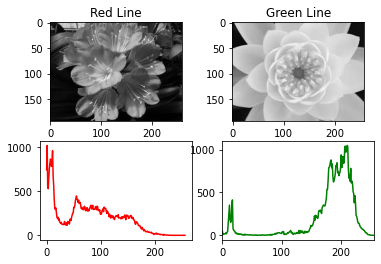

(32, 1)


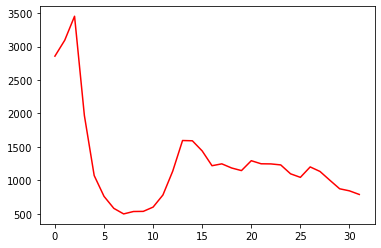

In [4]:
#-*- coding:utf-8 -*-
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# to histogram with intensity of pixe, load image with cv2.IMREAD_GRAY 
# img1 = cv2.imread('./images/flower1.jpg',0) 
# img2 = cv2.imread('./images/flower2.jpg',0)

img1 = cv2.imread(os.path.join(PATH, 'flower1.jpg'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join(PATH, 'flower2.jpg'), cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])



#plt.style.use('dark_background')
plt.subplot(2,2,1),plt.imshow(img1,'gray'),plt.title('Red Line')
plt.subplot(2,2,2),plt.imshow(img2,'gray'),plt.title('Green Line')
plt.subplot(2,2,3),plt.plot(hist1,color='r')
plt.subplot(2,2,4),plt.plot(hist2,color='g')
plt.xlim([0,256])
plt.show()


hist3 = cv2.calcHist([img1],[0],None,[32],[0,128])
print(np.shape(hist3))

plt.figure()
plt.plot(hist3,color='r')
plt.show()

* image  : 분석대상 이미지(uint8 or float32 type). Array형태.
* channels : 분석 채널(X축의 대상). 이미지가 graysacle이면 [0], color 이미지이면 [0,2] 형태(0 : Blue, 1: Green, 2: Red)
* mask : 이미지의 분석영역. None이면 전체 영역.
* histSize : BINS 값. [256]
* ranges : Range값. [0,256]

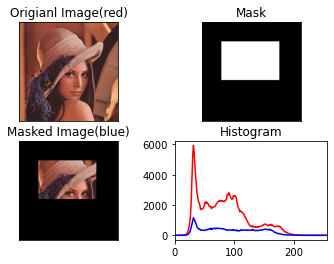

In [5]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


# img = cv2.imread('./images/lena.png');
img = cv2.imread(os.path.join(PATH, 'lena.png'))


# mask생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)

# 원본 이미지의 히스토그램 green
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램 green
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])

# bgr > rgb
#b,g,r = cv2.split(img) # divide img into b,g,r
#img = cv2.merge([r,g,b])
#b,g,r = cv2.split(masked_img)
#masked_img = cv2.merge([r,g,b])
img = img[:,:,::-1]
masked_img = masked_img[:,:,::-1]

#plt.style.use('dark_background')
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image(red)'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image(blue)'), plt.xticks([]), plt.yticks([])

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])

plt.show()

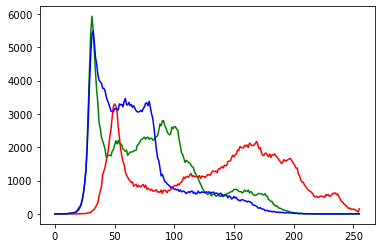

In [10]:
# opencv : BGR
# numpy, matplot : RGB
plt.figure()
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_full, color='r')
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_full, color='g')
hist_full = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_full, color='b')
plt.show()

In [11]:
img.shape

(512, 512, 3)

# Histogram Stretching

* Histogram 이 전구간에 펼쳐져서 나타나도록 늘려주는 기법.
* 전체적인 contrast를 향상시켜줌

$$
\textbf{dst}(x,y) 
= 
I_{max} 
\frac{ \textbf{src}(x,y) - \textbf{min}(\textbf{src[:]})} 
{\textbf{max}(\textbf{src[:]})-\textbf{min}(\textbf{src[:]})}
$$

# Histogram Equalization

* Histogram stretching 에 추가적으로 pixel의 분포값이 전영역에 고르게 분포되도록 뭉쳐있는 곳은 넓은 간격으로 histogram이 떨어지도록 조정.

* Histogram 누적 함수.
$$
\textbf{cdf}(g) = \Sigma_{0\le i \le g} h(i)
$$

* 결과 이미지의 값은 다음 수식으로 결정됨.
$$
\textbf{dst}(x,y) = round \left( I_{max} \frac{\textbf{cdf}((\textbf{src}(x,y))}{N} \right)
$$

  * 여기서 $I_{max}$는 pixel이 가질 수 있는 최대 intensity임.



In [12]:
np.histogram?

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a dataset.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to the s

hist:(256,),bins:(257,),cdf:(256,)
cdf_m:(256,)


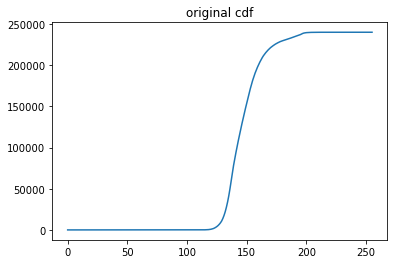

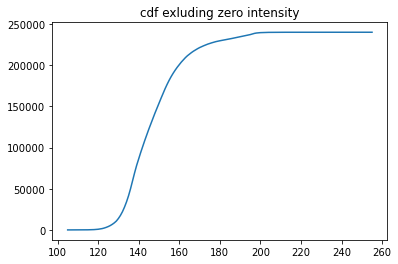

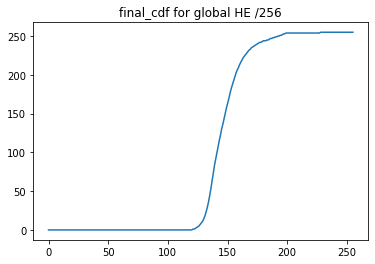

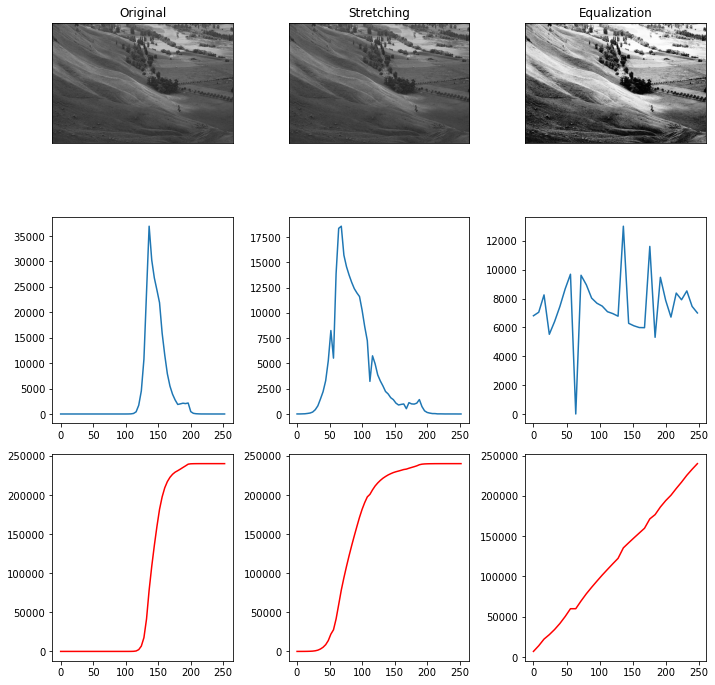

In [13]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


# img = cv2.imread('./images/hist_unequ.jpg');
img = cv2.imread(os.path.join(PATH, 'hist_unequ.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# numpy를 이용한 histogramming
hist, bin_edges = np.histogram(img.flatten(), 256,range=[0,256])
# cumulative histogram
cdf = hist.cumsum()
print(f'hist:{hist.shape},bins:{bin_edges.shape},cdf:{cdf.shape}')
plt.figure()
plt.title('original cdf')
plt.plot(cdf)


# ----------------------------------------------------
# Histogram Stretching
img_hs = 255.* (img - np.min(img))/(np.max(img)-np.min(img))

# -----------------------------------------------------
# Histogram Equalization
#
# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)
print(f'cdf_m:{cdf_m.shape}')
plt.figure()
plt.title('cdf exluding zero intensity')
plt.plot(cdf_m)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# plt.figure()
# plt.title('cdf for HE w/o zero bins'+str(len(cdf_m)))
# plt.plot(cdf_m)
# print(len(cdf_m))

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')
plt.figure()
plt.title('final_cdf for global HE /'+str(len(cdf)))
plt.plot(cdf)


img_he = cdf[img]


plt.figure(figsize=(10,10))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(331),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(332),plt.imshow(img_hs,cmap='gray'),plt.title('Stretching')
plt.xticks([]),plt.yticks([])
plt.subplot(333),plt.imshow(img_he,cmap='gray'),plt.title('Equalization')
plt.xticks([]),plt.yticks([])

bin_size = 4
hist, bins = np.histogram(img.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(334),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(337),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

bin_size = 4
hist, bins = np.histogram(img_hs.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(335),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(338),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')


bin_size = 8
hist, bins = np.histogram(img_he.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(336),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(339),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

plt.tight_layout()
plt.show()


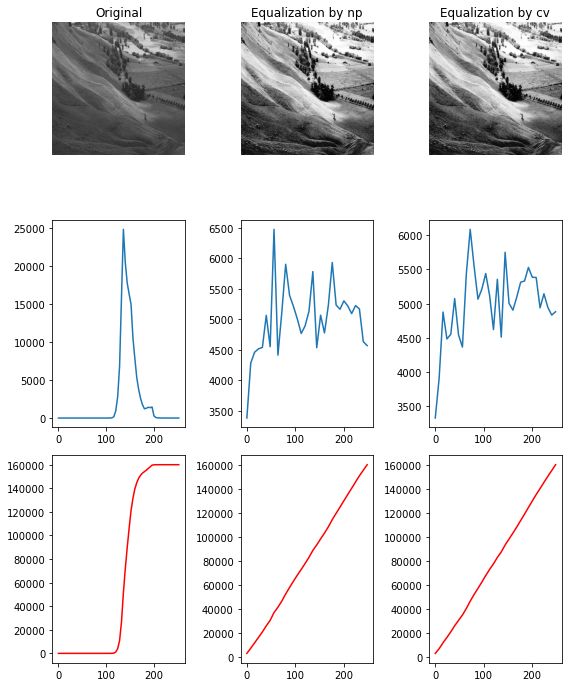

In [14]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


#img = cv2.imread('./images/hist_unequ.jpg',0);
img = cv2.imread(os.path.join(PATH, 'hist_unequ.jpg'),0)

# OpenCV의 Equaliztion함수
img_he_cv = cv2.equalizeHist(img)


img       = cv2.resize(img,(400,400))
img_he_cv = cv2.resize(img_he_cv,(400,400))
img_he    = cv2.resize(img_he,(400,400))


plt.figure(figsize=(8,10))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original')
plt.axis('off')

plt.subplot(332),plt.imshow(img_he,'gray'),plt.title('Equalization by np')
plt.axis('off')

plt.subplot(333),plt.imshow(img_he_cv,'gray'),plt.title('Equalization by cv')
plt.axis('off')
#plt.xticks([]),plt.yticks([])

bin_size = 4
hist, bins = np.histogram(img.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(334),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(337),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

bin_size = 8
hist, bins = np.histogram(img_he.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(335),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(338),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')


bin_size = 8
hist, bins = np.histogram(img_he_cv.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(336),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(339),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

plt.tight_layout()
plt.show()


# CLAHE (Contrast Limited Adaptive Histogram Equalization)

지금까지의 처리는 이미지의 전체적인 부분에 균일화를 적용하였습니다. 하지만 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여 있기 때문에 전체에 적용하는 것은 그렇게 유용하지 않습니다. 아래 결과를 보시면 이해가 될겁니다.


(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x7f13f2dcb6a0>])

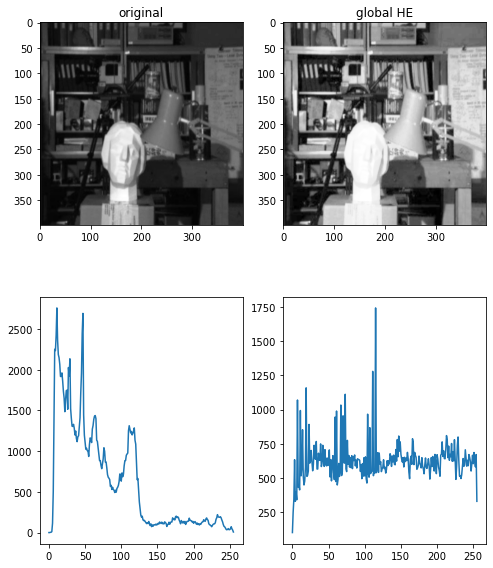

In [16]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


# img = cv2.imread('./images/clahe.png',0);
img = cv2.imread(os.path.join(PATH, 'clahe.png'),0)

# OpenCV의 Equaliztion함수
img2 = cv2.equalizeHist(img)
img =  cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))

dst = np.hstack((img, img2))
plt.figure(figsize=(8,10))
plt.imshow(dst,'gray')

plt.subplot(221), plt.imshow(img,'gray'), plt.title('original')
plt.subplot(222), plt.imshow(img2,'gray'), plt.title('global HE')
hist,bins = np.histogram(img,256,[0,256])
plt.subplot(223), plt.plot(hist)

hist,bins = np.histogram(img2,256,[0,256])
plt.subplot(224), plt.plot(hist)


It is true that the background contrast has improved after histogram equalization. 

But compare **the face of statue** in both images. 
* We lost most of the information there due to over-brightness. 
* It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).

So to solve this problem, **adaptive histogram equalization** is used. 

In this,
* image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). 
* Then each of these blocks are histogram equalized as usual. 
  * So in a small area, histogram would confine to a small region (unless there is noise). 
  * If noise is there, it will be amplified. 
* To avoid this, contrast limiting is applied. 
  * If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), 
  * those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. 
* After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

# contrast limit

AHE 의 단점인 **noise amplification**(노이즈의 영역이 커짐)을 해결

AHE의 영역에서 Noise가 있을시
* 해당 영역의 histogram의 높이가 매우 높고 좁은 intensity 범위에 집중됨(아래 오른쪽 그림).


1. 이 경우, 아래 그림 오른쪽 처럼 histogram의 높이에 제한을 걸어 특정 높이 이상에 있는 pixel 값들을 redistribution 하는 과정 수행.
  * 이 때 histogram 의 높이를 제한하는 값을 clip limit 이라고 부름. 
  * 이같은 redistribution 을 반복하여 최종 결과가 clip limit 의 값을 초과하지 않도록 처리.
4. 이 후, 해당 각 영역별로 cdf 를 계산하고 HE 수행.

즉, AHE에서 각 영역에서 Clip limit를 수행하여 AHE의 단점을 개선시킨 것이 바로 CLAHE임.


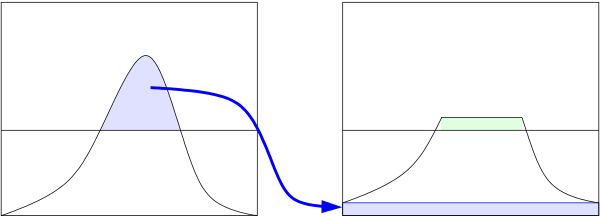

[Ref](https://3months.tistory.com/407)

`clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))`
* `clipLimit` : Histogram에서 Clip limit 수행하기 위한 제한값. 기본이 40임.
* `tileGridSize` : AHE에서 사용할 영역의 크기. 기본이 $8 \times 8$임.


이후 생성된 `clahe` 객체를 대상 영상에 적용.
`img2 = clahe.apply(img)`


(<AxesSubplot:>,
 [<matplotlib.lines.Line2D at 0x7f13f2feea00>])

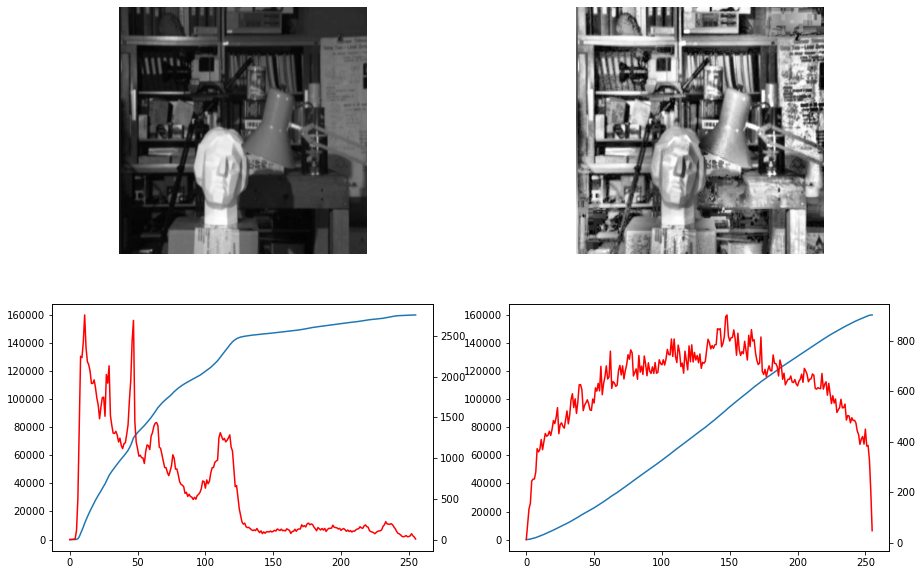

In [17]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


#img = cv2.imread('./images/clahe.png',0);
img = cv2.imread(os.path.join(PATH, 'clahe.png'),0)

# contrast limit가 40.0 (2를 넣어서 테스트해볼것)이고 title의 size는 8X8 <-(tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
#clahe = cv2.createCLAHE( tileGridSize=(8,8))
img2 = clahe.apply(img)

img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))


plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(img,'gray'), plt.axis("off")
plt.subplot(222), plt.imshow(img2,'gray'),plt.axis("off")
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(223), plt.plot(cdf), plt.twinx().plot(hist,color='r')

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(224), plt.plot(cdf),plt.twinx().plot(hist,color='r')


(<AxesSubplot:>,
 [<matplotlib.lines.Line2D at 0x7f13f28a8070>])

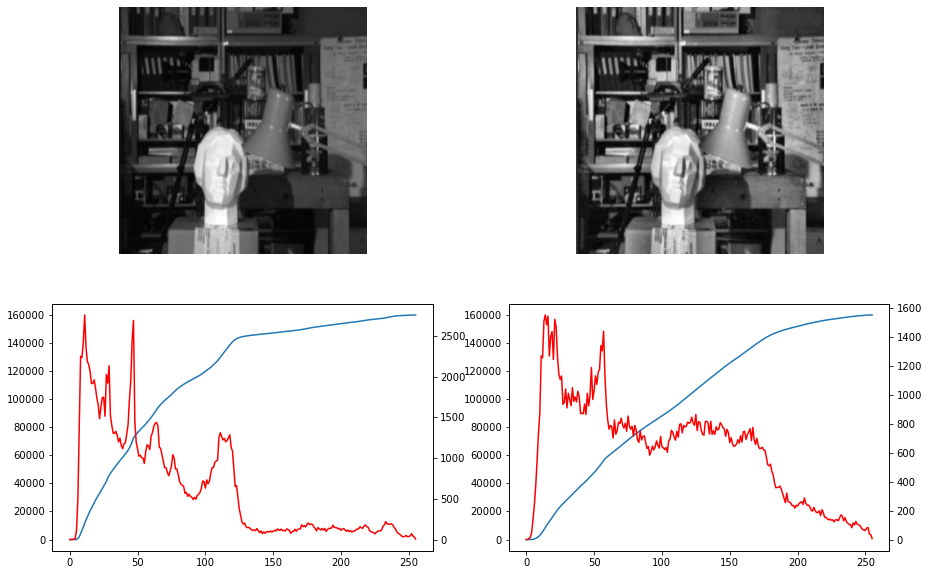

In [18]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


#img = cv2.imread('./images/clahe.png',0);
img = cv2.imread(os.path.join(PATH, 'clahe.png'),0)

# contrast limit가 40.0 (2를 넣어서 테스트해볼것)이고 title의 size는 8X8 <-(tileGridSize=(8,8))
# clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
img2 = clahe.apply(img)

img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))


plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(img,'gray'), plt.axis("off")
plt.subplot(222), plt.imshow(img2,'gray'),plt.axis("off")
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(223), plt.plot(cdf), plt.twinx().plot(hist,color='r')

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(224), plt.plot(cdf),plt.twinx().plot(hist,color='r')


In [20]:
cv2.createCLAHE?

Docstring:
createCLAHE([, clipLimit[, tileGridSize]]) -> retval
.   @brief Creates a smart pointer to a cv::CLAHE class and initializes it.
.   
.   @param clipLimit Threshold for contrast limiting.
.   @param tileGridSize Size of grid for histogram equalization. Input image will be divided into
.   equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.
Type:      builtin_function_or_method
